**Name: Isha Shrestha**

**NetID: is418**

DSCI 2012 - Data Wrangling Lab

# Lab 10: Geographical Data, Part 2

Today we'll dive a little further into common use cases for dealing with geographical data. Along the way, we will learn about proximity (how many houses are within 5 miles of highways, how many houses are within a certain distance of electric vehicle charging stations, etc.) and experience Census Data.

## Installing and / or Loading the Library

Conditionally, we'll install or import geopandas and pandas.

In [1]:
try:
  import geopandas as gpd
except:
  !pip install geopandas
  import geopandas as gpd

try:
  import pandas as pd
except:
  !pip install pandas
  import pandas as pd

## Highways

Let's use our old friend MARIS to get some highway data.

In [3]:
# load the file
msHighways = gpd.read_file("geoData2/geoData2/MS_DesignatedHighways_2010/MS_DesignatedHighways_2010.shp")

# check it out  
msHighways.shape

(581, 13)

Notice that there are 581 rows.

Let's look at the data.

In [5]:
msHighways.head(4)

OBJECTID    LENGTH HWYNAME  CLASS ALT1_DESIN ALT2_DESIN ALT3_DESIN  \
0         3   9460.53  MS 554      4       None       None       None   
1         8  68421.80    MS 2      3       None       None       None   
2         9  16561.00   MS 24      3       None       None      MS 33   
3        10   3824.72  MS 923      4       None       None       None   

  ALT4_DESIN ALT5_DESIN ALT6_DESIN ALT7_DESIN    Shape_Leng  \
0       None       None       None       None   9460.526123   
1       None       None       None       None  68421.838525   
2       None       None       None       None  16560.991876   
3       None       None       None       None   3824.722094   

                                            geometry  
0  MULTILINESTRING ((353911.625 1202701.875, 3540...  
1  MULTILINESTRING ((551882.583 1534980.26, 55188...  
2  LINESTRING (379922.312 1156624, 379920.062 115...  
3  LINESTRING (422010.125 1136905.5, 422116.656 1...

Looks like the geometry column has multiline strings - kind of like we used for finding the boundaries of our congressional districts in lab 1.

## Check the Projection

Let's see which projection our highway data from MARIS uses:

In [7]:
# .crs for 'coordinate reference system'
msHighways.crs

<Projected CRS: EPSG:3814>
Name: NAD83 / Mississippi TM
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Mississippi.
- bounds: (-91.65, 30.01, -88.09, 35.01)
Coordinate Operation:
- name: Mississippi Transverse Mercator
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Hey, our old friend EPSG:3814 (first line). We can use this for calculating lengths, etc.

## Visualizing the Plot

Let's visualize the highways so we can get our heads around how many there are by sight. We can make a legend using the length of the road from that informational column - length.

<Axes: >

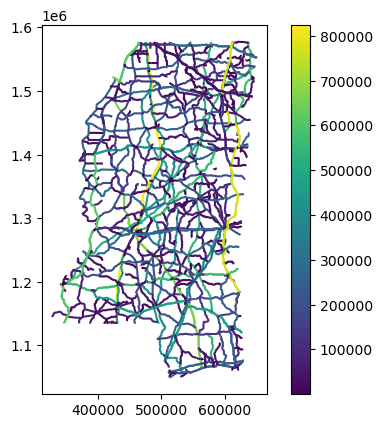

In [9]:
msHighways.plot("LENGTH", legend=True)

That's looking pretty good. We know our state and how it should be shaped. What is the longest highway in the data?

In [11]:
msHighways.query('LENGTH == @msHighways.LENGTH.max()').head()

OBJECTID    LENGTH HWYNAME  CLASS ALT1_DESIN ALT2_DESIN ALT3_DESIN  \
25       229  824574.0    I 55      1       None       None       None   

   ALT4_DESIN ALT5_DESIN ALT6_DESIN ALT7_DESIN     Shape_Leng  \
25       None       None       None       None  824574.221931   

                                             geometry  
25  MULTILINESTRING ((430153.531 1158390.625, 4301...

Awesome, we can see it's Interstate 55.

Let's find the length of our roads from the shapes themselves instead of relying on the LENGTH column.

In [13]:
# Create a new column with length calculated from geopandas
# judging by the CSR, the length should be in meters
msHighways['real_length'] = msHighways.length

# Look at the data now, sorted by our new column descending
msHighways.sort_values(by=['real_length'], ascending=False).head(10)

OBJECTID    LENGTH             HWYNAME  CLASS ALT1_DESIN ALT2_DESIN  \
25        229  824574.0                I 55      1       None       None   
515      7879  770193.0               US 45      2       None       None   
41        470  655441.0               US 49      2       None       None   
579      8277  604572.0               US 61      2       None       None   
48        691  565231.0               MS 25      3       None       None   
60        899  559616.0               US 84      2       None       None   
42        473  533449.0               MS 15      3       None       None   
45        616  503580.0  NATCHEZ TRACE PKWY      5       None       None   
26        238  472862.0               US 51      2       None       None   
527      8037  468753.0               US 98      2       None       None   

    ALT3_DESIN ALT4_DESIN ALT5_DESIN ALT6_DESIN ALT7_DESIN     Shape_Leng  \
25        None       None       None       None       None  824574.221931   
515       None       None       None       None       None  770192.671565   
41        None       None       None       None       None  655440.771481   
579       None       None       None       None       None  603346.614191   
48        None       None       None       None       None  565230.984691   
60        None       None       None       None       None  559615.514968   
42        None       None       None       None       None  533448.629669   
45        None       None       None       None       None  503579.541555   
26        None       None       None       None       None  472861.959270   
527       None       None       None       None       None  468752.526489   

                                              geometry    real_length  
25   MULTILINESTRING ((430153.531 1158390.625, 4301...  824574.221931  
515  MULTILINESTRING ((623445.5 1182737.5, 623507.2...  770192.671565  
41   MULTILINESTRING ((563147.062 1064797.5, 563161...  655440.771481  
579  MULTILINESTRING ((347454.406 1166623.25, 34749...  603346.614191  
48   MULTILINESTRING ((460033.344 1281638.375, 4604...  565230.984691  
60   MULTILINESTRING ((344339.334 1193487.468, 3443...  559615.514968  
42   MULTILINESTRING ((580640.062 1077073.125, 5805...  533448.629669  
45   MULTILINESTRING ((346538.656 1195509.5, 346469...  503579.541555  
26   MULTILINESTRING ((433227.094 1154608.375, 4332...  472861.959270  
527  MULTILINESTRING ((627000.874 1119533.689, 6270...  468752.526489

Cool, the top two are I-55, Hwy 45, Hwy 49, 61, etc. 

If you're not pressed for time, take a break and listen to a few songs from Bob Dylan's album "Highway 61 Revisited" or Howlin Wolf's song "Highway 49." Or write your own ode to the Natchez Trace Parkway.

## Pulling out the Natchez Trace Parkway

Let's get the Natchez Trace Parkway into a separate data frame.


In [15]:
# let's pull it into a new dataframe
natchezTrace = msHighways.query("HWYNAME == 'NATCHEZ TRACE PKWY'")

# let's take it out of our original dataframe
msHighways = msHighways.drop(labels=45, axis=0)

natchezTrace

OBJECTID    LENGTH             HWYNAME  CLASS ALT1_DESIN ALT2_DESIN  \
45       616  503580.0  NATCHEZ TRACE PKWY      5       None       None   

   ALT3_DESIN ALT4_DESIN ALT5_DESIN ALT6_DESIN ALT7_DESIN     Shape_Leng  \
45       None       None       None       None       None  503579.541555   

                                             geometry    real_length  
45  MULTILINESTRING ((346538.656 1195509.5, 346469...  503579.541555

In [17]:
# Cool, let's check to be sure the trace isn't in our top 10 anymore
msHighways.sort_values(by=['real_length'], ascending=False).head(10)


OBJECTID    LENGTH HWYNAME  CLASS ALT1_DESIN ALT2_DESIN ALT3_DESIN  \
25        229  824574.0    I 55      1       None       None       None   
515      7879  770193.0   US 45      2       None       None       None   
41        470  655441.0   US 49      2       None       None       None   
579      8277  604572.0   US 61      2       None       None       None   
48        691  565231.0   MS 25      3       None       None       None   
60        899  559616.0   US 84      2       None       None       None   
42        473  533449.0   MS 15      3       None       None       None   
26        238  472862.0   US 51      2       None       None       None   
527      8037  468753.0   US 98      2       None       None       None   
114      2030  454376.0    I 59      1       None       None       None   

    ALT4_DESIN ALT5_DESIN ALT6_DESIN ALT7_DESIN     Shape_Leng  \
25        None       None       None       None  824574.221931   
515       None       None       None       None  770192.671565   
41        None       None       None       None  655440.771481   
579       None       None       None       None  603346.614191   
48        None       None       None       None  565230.984691   
60        None       None       None       None  559615.514968   
42        None       None       None       None  533448.629669   
26        None       None       None       None  472861.959270   
527       None       None       None       None  468752.526489   
114       None       None       None       None  454376.213535   

                                              geometry    real_length  
25   MULTILINESTRING ((430153.531 1158390.625, 4301...  824574.221931  
515  MULTILINESTRING ((623445.5 1182737.5, 623507.2...  770192.671565  
41   MULTILINESTRING ((563147.062 1064797.5, 563161...  655440.771481  
579  MULTILINESTRING ((347454.406 1166623.25, 34749...  603346.614191  
48   MULTILINESTRING ((460033.344 1281638.375, 4604...  565230.984691  
60   MULTILINESTRING ((344339.334 1193487.468, 3443...  559615.514968  
42   MULTILINESTRING ((580640.062 1077073.125, 5805...  533448.629669  
26   MULTILINESTRING ((433227.094 1154608.375, 4332...  472861.959270  
527  MULTILINESTRING ((627000.874 1119533.689, 6270...  468752.526489  
114  MULTILINESTRING ((508505.219 1080681.25, 50848...  454376.213535

Let's check out the Trace plot.

<Axes: >

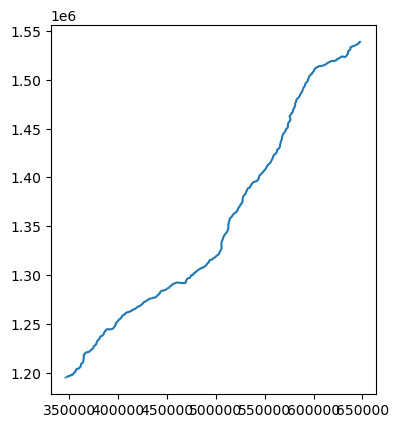

In [19]:
# Let's see the trace
natchezTrace.plot()

<Axes: >

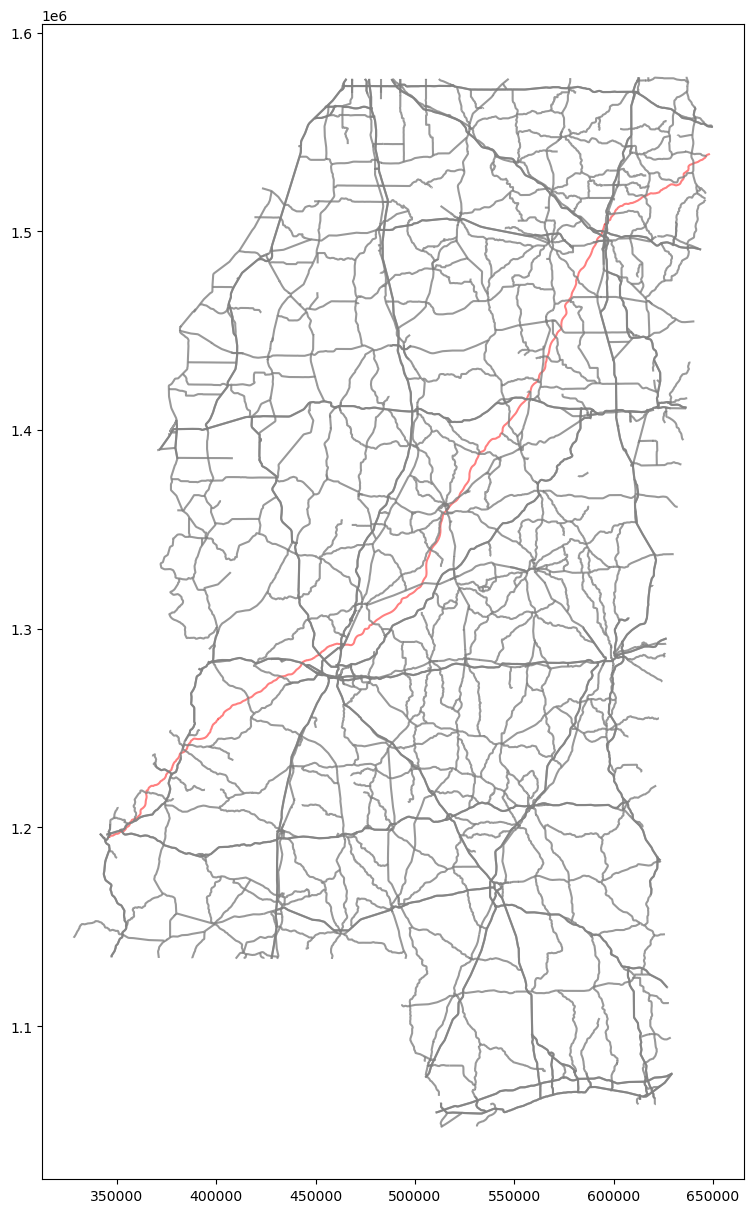

In [21]:
# Let's look it in context

# saving the natchez trace plot as an axis and setting alpha (transparency) to 0.5
ax = natchezTrace.plot(alpha=.5, color="red", figsize=(15, 15))  

# passing the first plot as an axis to the second
msHighways.plot(ax=ax, color="grey", alpha=.8, figsize=(15, 15))  


You can see that Mississippi wears the Natchez Trace like a beauty pageant contestant wears a sash. The trace actually extends outside of Mississippi, another 160 kilometers or so to Nashville.

The Natchez Trace has no advertising, no billboards, a low speed limit, and no street lights. It's an amazing experience to drive on it, motorcycle on it, etc. People approach it like an automotive Appalachian Trail.

## Our Question: Exercise 1

The Natchez Trace is great, but how would it work in an electric car? Let's assume we're in a base-level Tesla Model 3 and we start the trip on the Natchez trace at the top corner of Mississippi with a full charge in the month of July. How many times would we need to re-charge the car on our trip down to Vicksburg? Let's first figure out the facts of the car / range / number of recharges.

In [23]:
# a. Output the length of the Natchez Trace in miles - "The Natches trace is X miles long."
natchez_trace_length = natchezTrace['LENGTH'].sum() * 0.000621371
print(f"The Natchez Trace is {natchez_trace_length:.2f} miles long.")

# b. Declare a variable that contains the range in miles of a Tesla in July (not cold)
tesla_july_range = 272

# c. Output the number of recharges you'd need
recharges_needed = (natchez_trace_length/tesla_july_range)
print(f"You would need {int(recharges_needed) + (1 if recharges_needed % 1 != 0 else 0)} recharges to travel the Natchez Trace.")


The Natchez Trace is 312.91 miles long.
You would need 2 recharges to travel the Natchez Trace.


## Fueling Stations

To really answer our question, we need a data frame full of fueling stations. 

Let's load up this csv file. It's not a shapefile, just normal pandas.

In [25]:
fuelingStations = pd.read_csv("geoData2/geoData2/fuelingStations.csv")

fuelingStations

FID_1 Fuel_Type                          Station_Na  \
0     3037       LPG                       Dowdle Gas Co   
1     3039       LPG                            AmeriGas   
2     3040       LPG                       Dowdle Gas Co   
3     3041       LPG                       Dowdle Gas Co   
4     3042       LPG                     Scott Petroleum   
..     ...       ...                                 ...   
160   3908       CNG   Clean N' Green - Waste Management   
161   3965       CNG  NGV Solutions LLC - Public Station   
162   3967       LPG       Community Counseling Services   
163   3969       LNG       Clean Energy - Pearl Flying J   
164   3998      ELEC                     Old Capitol Inn   

               Street_Add                                     Intersecti  \
0        8224 Highway 178                                            NaN   
1         1585 Memphis St                      Highway 51 and Memphis St   
2         459 Highway 6 W  Highway 6 W toward Batesville, past Belk Ford   
3         1705 City Ave N                                            NaN   
4        905 Highway 12 W                                            NaN   
..                    ...                                            ...   
160  1450 Country Club Dr                                            NaN   
161      5495 Lakeland Dr          Intersection of Wertz and Lakeland Dr   
162     1032 Highway 50 W                                            NaN   
163      685 Highway 80 E                                            NaN   
164        226 N State St                                            NaN   

           City State    ZIP  Plus4    Station_Ph  ... Owner_Type Federal_Ag  \
0       Byhalia    MS  38611      0  662-838-6559  ...          P        NaN   
1      Hernando    MS  38632      0  662-429-6211  ...          P        NaN   
2        Oxford    MS  38655   9073  662-234-7310  ...          P        NaN   
3        Ripley    MS  38663   1128  662-837-9933  ...          P        NaN   
4    Starkville    MS  39759      0  662-324-5311  ...          P        NaN   
..          ...   ...    ...    ...           ...  ...        ...        ...   
160     Jackson    MS  39209      0  800-950-3835  ...          P        NaN   
161     Flowood    MS  39232      0  601-982-1244  ...          P        NaN   
162  West Point    MS  39773      0           NaN  ...          P        NaN   
163       Pearl    MS  39208      0  562-493-2804  ...          P        NaN   
164     Jackson    MS  39201      0  888-758-4389  ...          P        NaN   

    Federal__1                 Open_Date Hydrogen_S NG_Vehicle LPG_Primar  \
0          NaN                       NaN        NaN        NaN      False   
1          NaN                       NaN        NaN        NaN       True   
2          NaN                       NaN        NaN        NaN      False   
3          NaN                       NaN        NaN        NaN      False   
4          NaN                       NaN        NaN        NaN      False   
..         ...                       ...        ...        ...        ...   
160        NaN  2013-07-31T00:00:00.000Z        NaN         HD        NaN   
161        NaN  2012-01-01T00:00:00.000Z        NaN         HD        NaN   
162        NaN                       NaN        NaN        NaN        NaN   
163        NaN                       NaN        NaN         HD        NaN   
164        NaN  2012-03-15T00:00:00.000Z        NaN        NaN        NaN   

     E85_Blende  longitude   latitude  
0           NaN -89.704105  34.877252  
1           NaN -89.997071  34.837235  
2           NaN -89.719672  34.349356  
3           NaN -88.943761  34.752060  
4           NaN -88.827134  33.453948  
..          ...        ...        ...  
160         NaN -90.248147  32.347875  
161         NaN -90.030266  32.350715  
162         NaN -88.669340  33.609788  
163         NaN -90.160513  32.276647  
164         NaN -90.179684  32.301260  

[165

Cool - we can see there are latitude and longitude columns. We can probably convert this into a geopandas dataframe!

### Convert Pandas DF to Geopandas DF

We can do this by creating a geopandas frame that uses the lat / lon columns to create a geometry column.

In [27]:
# construct the dataframe using our fuelingStations frame and 
# creating geometry from the latitude and longitude columns
fuelingStations = gpd.GeoDataFrame(
    fuelingStations, geometry=gpd.points_from_xy(
        fuelingStations.longitude, fuelingStations.latitude))

fuelingStations.head()

FID_1 Fuel_Type       Station_Na        Street_Add  \
0   3037       LPG    Dowdle Gas Co  8224 Highway 178   
1   3039       LPG         AmeriGas   1585 Memphis St   
2   3040       LPG    Dowdle Gas Co   459 Highway 6 W   
3   3041       LPG    Dowdle Gas Co   1705 City Ave N   
4   3042       LPG  Scott Petroleum  905 Highway 12 W   

                                      Intersecti        City State    ZIP  \
0                                            NaN     Byhalia    MS  38611   
1                      Highway 51 and Memphis St    Hernando    MS  38632   
2  Highway 6 W toward Batesville, past Belk Ford      Oxford    MS  38655   
3                                            NaN      Ripley    MS  38663   
4                                            NaN  Starkville    MS  39759   

   Plus4    Station_Ph  ... Federal_Ag Federal__1 Open_Date Hydrogen_S  \
0      0  662-838-6559  ...        NaN        NaN       NaN        NaN   
1      0  662-429-6211  ...        NaN        NaN       NaN        NaN   
2   9073  662-234-7310  ...        NaN        NaN       NaN        NaN   
3   1128  662-837-9933  ...        NaN        NaN       NaN        NaN   
4      0  662-324-5311  ...        NaN        NaN       NaN        NaN   

  NG_Vehicle LPG_Primar E85_Blende  longitude   latitude  \
0        NaN      False        NaN -89.704105  34.877252   
1        NaN       True        NaN -89.997071  34.837235   
2        NaN      False        NaN -89.719672  34.349356   
3        NaN      False        NaN -88.943761  34.752060   
4        NaN      False        NaN -88.827134  33.453948   

                     geometry  
0  POINT (-89.70411 34.87725)  
1  POINT (-89.99707 34.83723)  
2  POINT (-89.71967 34.34936)  
3  POINT (-88.94376 34.75206)  
4  POINT (-88.82713 33.45395)  

[5 rows x 41 columns]

What projection (crs) did it choose?

In [29]:
fuelingStations.crs

Weird, no output, right? We need to assign it a crs. Note we're not converting (to_crs) at first, we're just assigning it one.

In [31]:
# the lat/lons are expressed in degrees (polar coordinates), so let's use 4326
fuelingStations.crs = "EPSG:4326"

# then, to work with it in the context of our other data, let's convert to 
# the geodetic crs to match our MARIS data which is cartesian and in meters
fuelingStations= fuelingStations.to_crs("EPSG:3814")

fuelingStations.tail()

FID_1 Fuel_Type                          Station_Na  \
160   3908       CNG   Clean N' Green - Waste Management   
161   3965       CNG  NGV Solutions LLC - Public Station   
162   3967       LPG       Community Counseling Services   
163   3969       LNG       Clean Energy - Pearl Flying J   
164   3998      ELEC                     Old Capitol Inn   

               Street_Add                             Intersecti        City  \
160  1450 Country Club Dr                                    NaN     Jackson   
161      5495 Lakeland Dr  Intersection of Wertz and Lakeland Dr     Flowood   
162     1032 Highway 50 W                                    NaN  West Point   
163      685 Highway 80 E                                    NaN       Pearl   
164        226 N State St                                    NaN     Jackson   

    State    ZIP  Plus4    Station_Ph  ... Federal_Ag Federal__1  \
160    MS  39209      0  800-950-3835  ...        NaN        NaN   
161    MS  39232      0  601-982-1244  ...        NaN        NaN   
162    MS  39773      0           NaN  ...        NaN        NaN   
163    MS  39208      0  562-493-2804  ...        NaN        NaN   
164    MS  39201      0  888-758-4389  ...        NaN        NaN   

                    Open_Date Hydrogen_S NG_Vehicle LPG_Primar E85_Blende  \
160  2013-07-31T00:00:00.000Z        NaN         HD        NaN        NaN   
161  2012-01-01T00:00:00.000Z        NaN         HD        NaN        NaN   
162                       NaN        NaN        NaN        NaN        NaN   
163                       NaN        NaN         HD        NaN        NaN   
164  2012-03-15T00:00:00.000Z        NaN        NaN        NaN        NaN   

     longitude   latitude                        geometry  
160 -90.248147  32.347875  POINT (453114.649 1283242.086)  
161 -90.030266  32.350715  POINT (473622.409 1283482.434)  
162 -88.669340  33.609788  POINT (600276.389 1423584.509)  
163 -90.160513  32.276647  POINT (461332.533 1275309.683)  
164 -90.179684  32.301260  POINT (459537.678 1278045.682)  

[5 rows x 41 columns]

### Exercise 2: Plotting Refueling Stations

<Axes: >

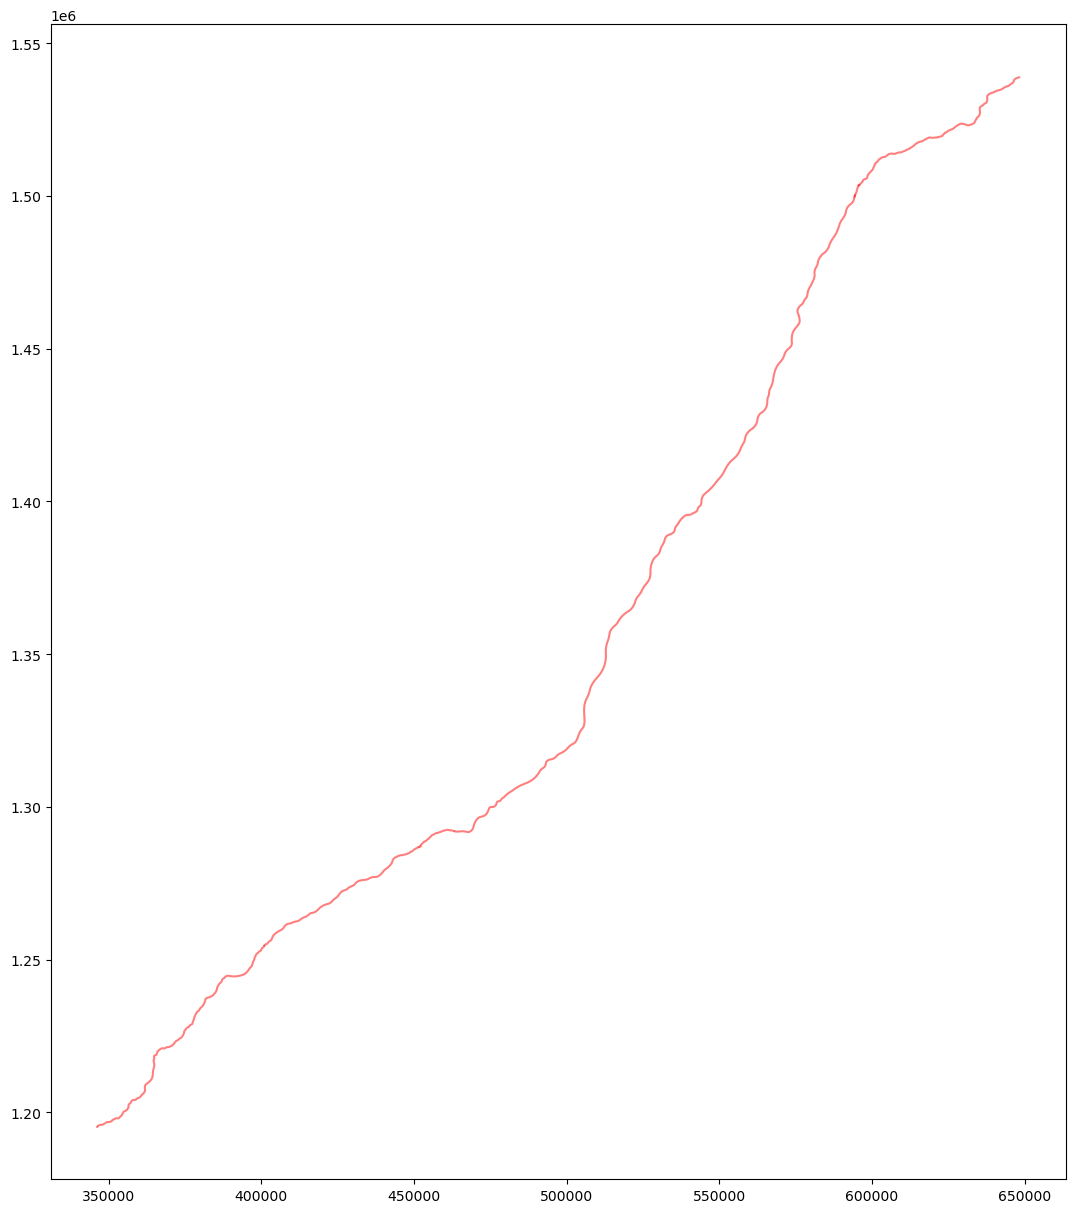

In [33]:
# a. Show the natchez trace in Red (save as an axis)
natchezTrace.plot(alpha=.5, color="red", figsize=(15, 15)) 

<Axes: >

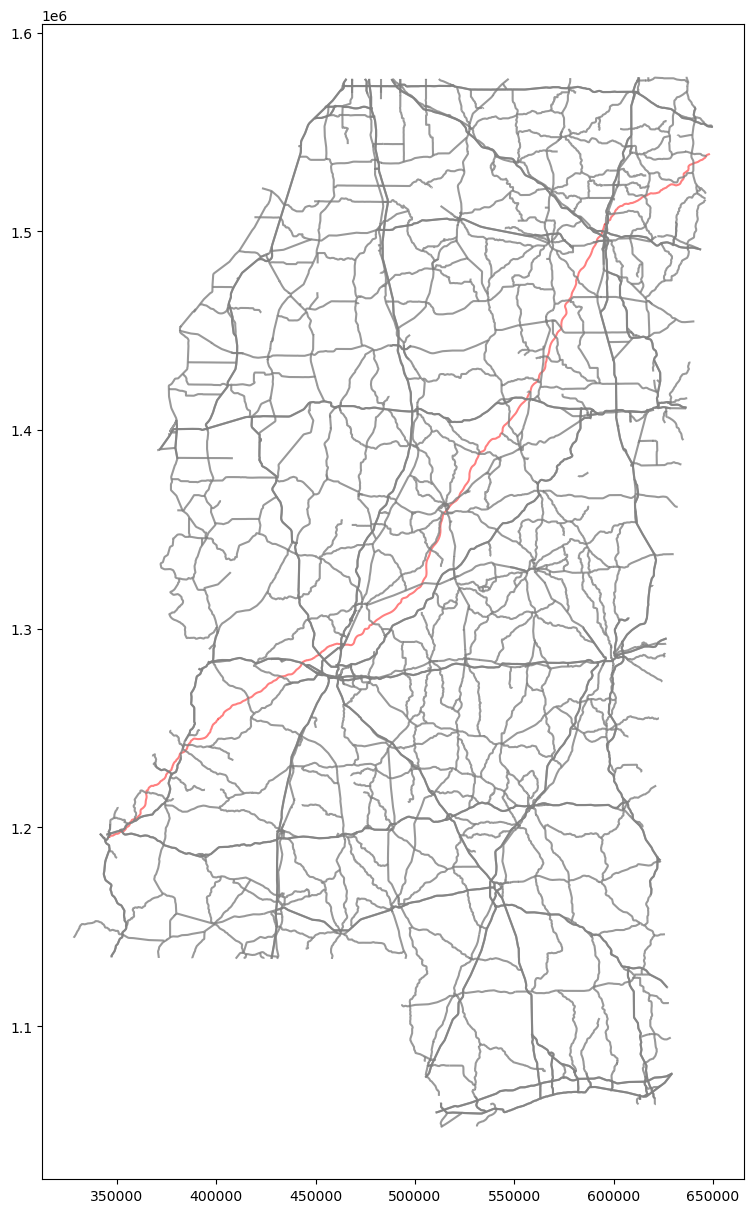

In [35]:
# b. Show the highways in light grey, passing in the natchez trace as an axis
ax = natchezTrace.plot(alpha=.5, color="red", figsize=(15, 15))  

# passing the first plot as an axis to the second
msHighways.plot(ax=ax, color="grey", alpha=.8, figsize=(15, 15))  

<Axes: >

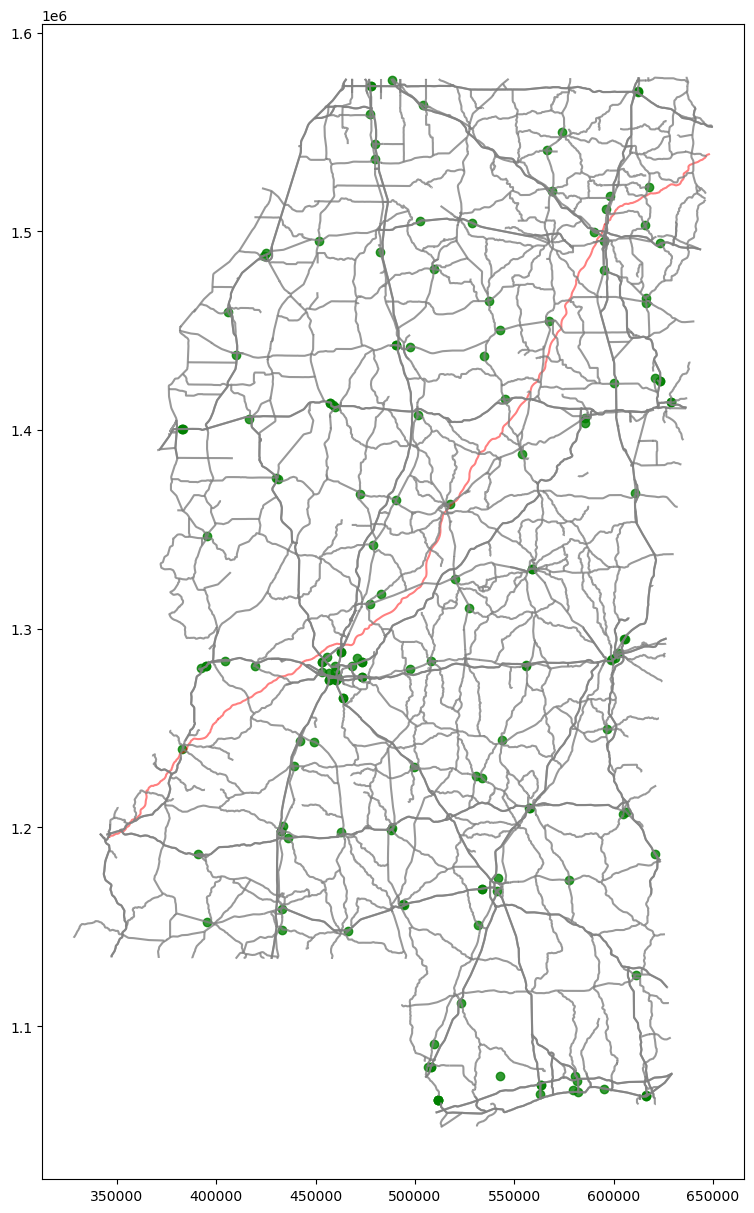

In [36]:
# c. Show the Fueling Stations as green points
ax = natchezTrace.plot(alpha=.5, color="red", figsize=(15, 15))  


msHighways.plot(ax=ax, color="grey", alpha=.8, figsize=(15, 15))  
fuelingStations.plot(ax=ax, color="green", alpha=.8, figsize=(15, 15))  

### Exercise 3: Getting Closer to an Answer to Our Question

<Axes: >

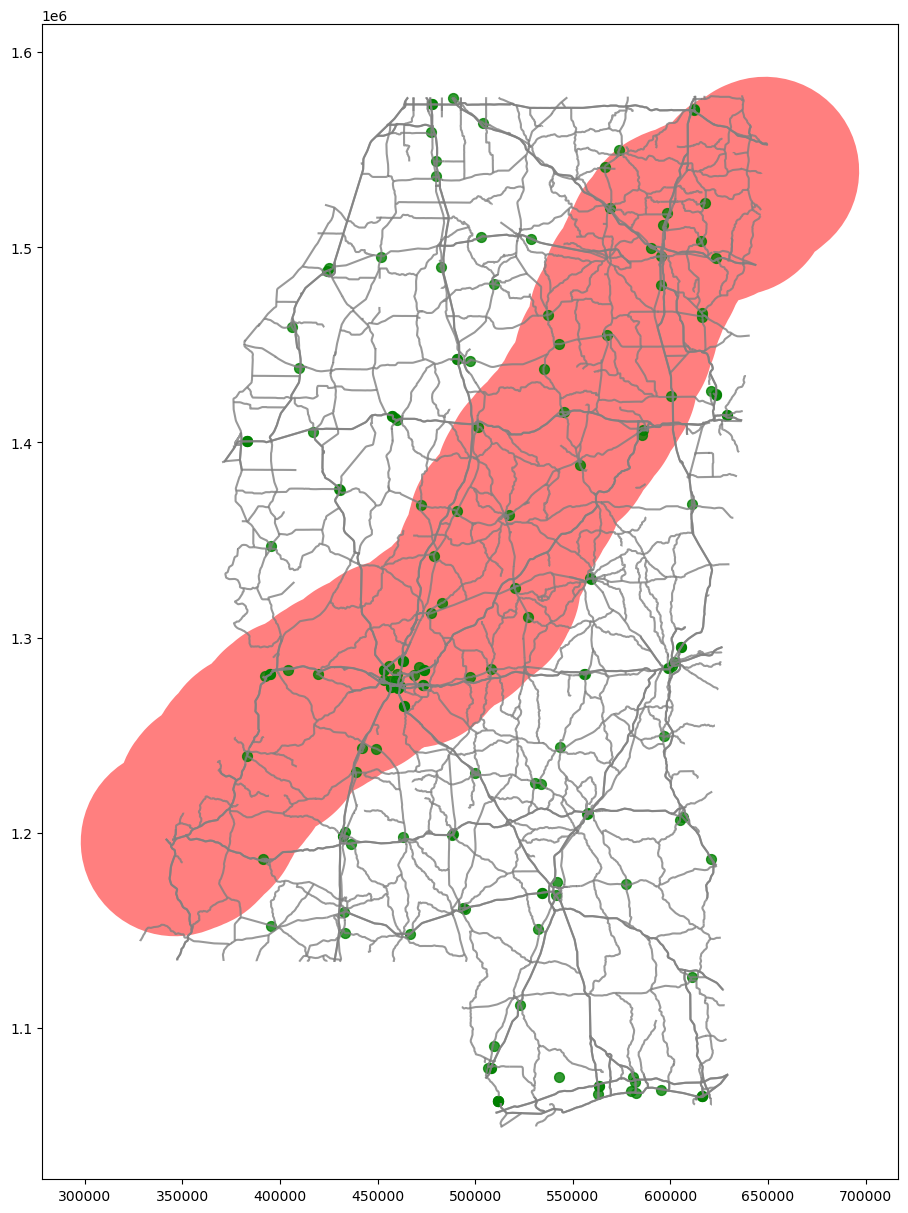

In [39]:
## Exercise 3 

# 1. Create a 30-mile buffer around the natchez trace and graph it 
# relative to the refueling stations.
# 1 mile = 1609.34 m
# 30 miles x 1609.34 = 48280.2 m
buffer_distance = 30 * 1609.34
natchezTrace['buffered'] = natchezTrace['geometry'].buffer(buffer_distance)

axis = natchezTrace['buffered'].plot(alpha=.5, color="red", figsize=(15, 15))  


msHighways.plot(ax=axis, color="grey", alpha=.8, figsize=(15, 15))  
fuelingStations.plot(ax=axis, color="green", markersize=50,alpha=.8, figsize=(15, 15)) 

In [41]:
# 2. Add a label on the refueling stations. Use "E" for electric and "O" for other.
fuelingStations['label'] = fuelingStations['Fuel_Type'].apply(lambda x : "E" if x.lower() == "elec" else"O")
# 3. Get a new pandas dataframe containing only the electric refueling 
# stations that are within the 30-mile buffer. If there are none,
# keep adjusting your buffer 'til you reach a buffer size of 
# 1/4 the range of your Tesla.
# You can use techniques from the previous lab or 
# Use the "overlay" technique - example here: 
# https://geopandas.org/en/stable/docs/user_guide/set_operations.html
electric_stations = fuelingStations[fuelingStations['label'] == "E"]
electric_stations

FID_1 Fuel_Type                                         Station_Na  \
32    3280      ELEC                        Gray-Daniels Nissan Brandon   
34    3282      ELEC       Gray-Daniels Nissan Brandon - Service Center   
36    3284      ELEC                                Paul Barnett Nissan   
38    3286      ELEC               Paul Barnett Nissan - Service Center   
40    3288      ELEC                                    Columbus Nissan   
41    3289      ELEC                   Columbus Nissan - Service Center   
42    3290      ELEC                               James Ceranti Nissan   
43    3291      ELEC              James Ceranti Nissan - Service Center   
44    3292      ELEC                                      Cannon Nissan   
45    3293      ELEC                     Cannon Nissan - Service Center   
46    3294      ELEC                                     Grenada Nissan   
47    3295      ELEC                    Grenada Nissan - Service Center   
48    3296      ELEC                                    Pat Peck Nissan   
49    3297      ELEC                   Pat Peck Nissan - Service Center   
50    3298      ELEC                             Petro Automotive Group   
51    3299      ELEC            Petro Automotive Group - Service Center   
52    3300      ELEC                              Cannon Nissan Jackson   
53    3301      ELEC             Cannon Nissan Jackson - Service Center   
54    3302      ELEC                        Gray-Daniels Nissan Jackson   
55    3303      ELEC       Gray-Daniels Nissan Jackson - Service Center   
56    3304      ELEC                   Chandler Nissan - Service Center   
57    3305      ELEC                                 Estabrook Motor Co   
58    3306      ELEC                Estabrook Motor Co - Service Center   
92    3452      ELEC                                 Nissan of Picayune   
93    3454      ELEC                Nissan of Picayune - Service Center   
95    3458      ELEC                                     Landers Nissan   
97    3460      ELEC                    Landers Nissan - Service Center   
98    3462      ELEC                                   Blackburn Nissan   
101   3465      ELEC                  Blackburn Nissan - Service Center   
151   3620      ELEC                               Stennis Space Center   
157   3899      ELEC  Entergy - Mississippi State Center for Advance...   
158   3900      ELEC                 Entergy - Jackson State University   
159   3901      ELEC                           Entergy - Medical Center   
164   3998      ELEC                                    Old Capitol Inn   

                  Street_Add                                Intersecti  \
32     108 Gray Daniels Blvd                                       NaN   
34     108 Gray Daniels Blvd                                       NaN   
36         845 Brookway Blvd                                       NaN   
38         845 Brookway Blvd                                       NaN   
40          100 Highway 12 E                                       NaN   
41          100 Highway 12 E                                       NaN   
42         3130 Highway 82 E                                       NaN   
43         3130 Highway 82 E                                       NaN   
44        69900 Highway 82 W                                       NaN   
45        69900 Highway 82 W                                       NaN   
46            2105 Sunset Dr                                       NaN   
47            2105 Sunset Dr                                       NaN   
48        9480 US Highway 49                                       NaN   
49        9480 US Highway 49                                       NaN   
50         6248 Highway 98 W                                       NaN   
51         6248 Highway 98 W                                       NaN   
52      905 I-20 Frontage Rd                                       NaN   
53      905 I-20 Frontage Rd                   

In [47]:
natchezTrace = natchezTrace.set_geometry("buffered")
stations_within_buffer = gpd.overlay(electric_stations,natchezTrace , how='intersection')
stations_within_buffer_df = stations_within_buffer.drop(columns="geometry")

stations_within_buffer_df

FID_1 Fuel_Type                                         Station_Na  \
0    3280      ELEC                        Gray-Daniels Nissan Brandon   
1    3282      ELEC       Gray-Daniels Nissan Brandon - Service Center   
2    3300      ELEC                              Cannon Nissan Jackson   
3    3301      ELEC             Cannon Nissan Jackson - Service Center   
4    3302      ELEC                        Gray-Daniels Nissan Jackson   
5    3303      ELEC       Gray-Daniels Nissan Jackson - Service Center   
6    3462      ELEC                                   Blackburn Nissan   
7    3465      ELEC                  Blackburn Nissan - Service Center   
8    3899      ELEC  Entergy - Mississippi State Center for Advance...   
9    3900      ELEC                 Entergy - Jackson State University   
10   3901      ELEC                           Entergy - Medical Center   
11   3998      ELEC                                    Old Capitol Inn   

                 Street_Add                                Intersecti  \
0     108 Gray Daniels Blvd                                       NaN   
1     108 Gray Daniels Blvd                                       NaN   
2      905 I-20 Frontage Rd                                       NaN   
3      905 I-20 Frontage Rd                                       NaN   
4   6080 I-55 N Frontage Rd                                       NaN   
5   6080 I-55 N Frontage Rd                                       NaN   
6        2195 N Frontage Rd                                       NaN   
7        2195 N Frontage Rd                                       NaN   
8        Old Mississippi 16                                       NaN   
9          1400 JR Lynch St                    NE side of parking lot   
10          2500 N State St  Located in transportation/shopping area.   
11           226 N State St                                       NaN   

         City State    ZIP  Plus4    Station_Ph  ... CLASS ALT1_DESIN  \
0     Brandon    MS  39042      0  601-948-3050  ...     5       None   
1     Brandon    MS  39042      0           NaN  ...     5       None   
2     Jackson    MS  39204      0  601-360-7490  ...     5       None   
3     Jackson    MS  39204      0           NaN  ...     5       None   
4     Jackson    MS  39211      0  601-956-7522  ...     5       None   
5     Jackson    MS  39211      0           NaN  ...     5       None   
6   Vicksburg    MS  39180      0  601-661-7565  ...     5       None   
7   Vicksburg    MS  39180      0           NaN  ...     5       None   
8      Canton    MS  39046      0           NaN  ...     5       None   
9     Jackson    MS  39203      0           NaN  ...     5       None   
10    Jackson    MS  39216      0           NaN  ...     5       None   
11    Jackson    MS  39201      0  888-758-4389  ...     5       None   

   ALT2_DESIN ALT3_DESIN ALT4_DESIN ALT5_DESIN ALT6_DESIN  ALT7_DESIN  \
0        None       None       None       None       None        None   
1        None       None       None       None       None        None   
2        None       None       None       None       None        None   
3        None       None       None       None       None        None   
4        None       None       None       None       None        None   
5        None       None       None       None       None        None   
6        None       None       None       None       None        None   
7        None       None       None       None       None        None   
8        None       None       None       None       None        None   
9        None       None       None       None       None        None   
10       None       None       None       None       None        None   
11       None       None       None       None       None        None   

       Shape_Leng    real_length  
0   503579.541555  503579.541555  
1   503579.541555  503579.541555  
2   503579.541555  503579.541555  
3   503579.541555  503579.541555  
4   503579.54155

In [ ]:
# 4. Plot the Natchez Trace with buffer along with the electric refueling stations.

<Axes: >

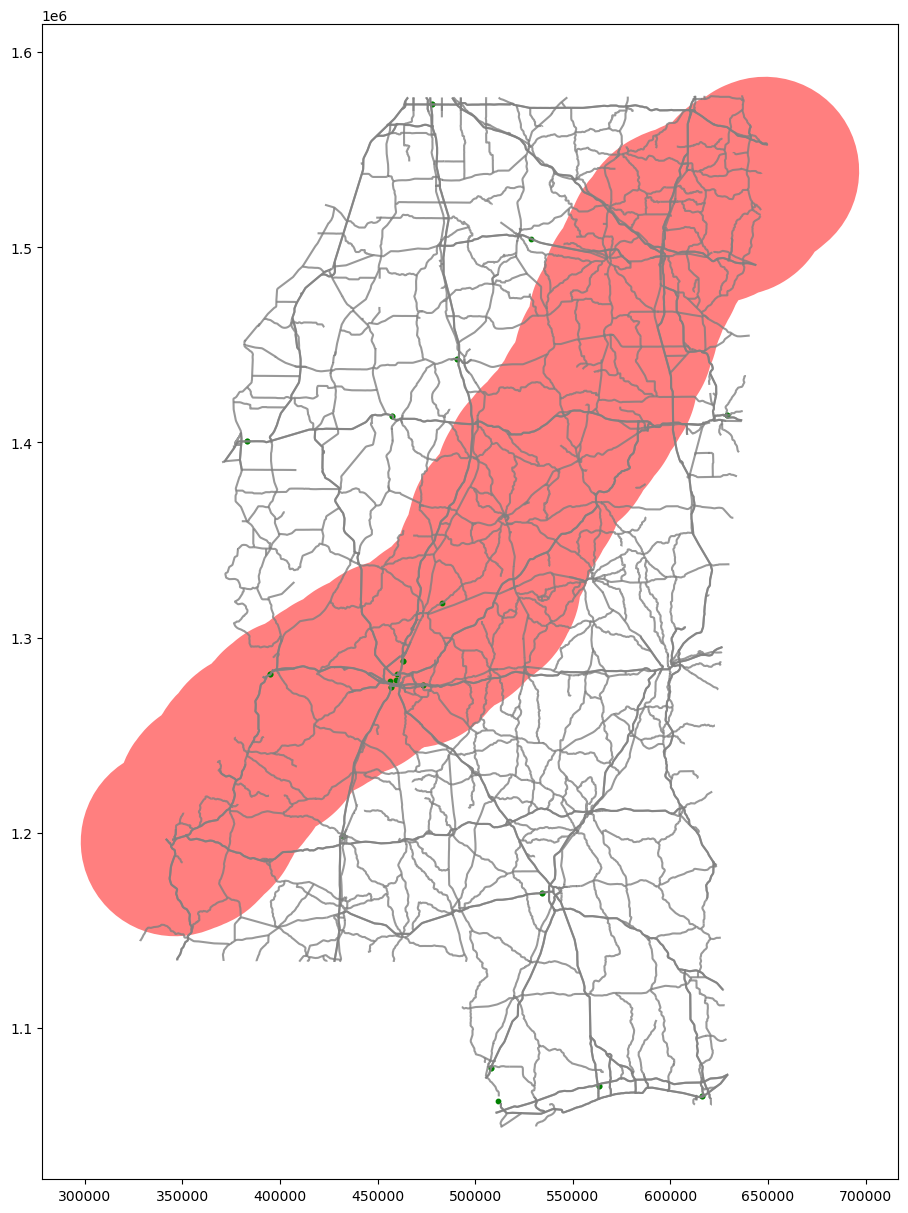

In [45]:
ax = natchezTrace['buffered'].plot(alpha=.5, color="red", figsize=(15, 15))  


msHighways.plot(ax=ax, color="grey", alpha=.8, figsize=(15, 15))
electric_stations.plot(ax=ax, color="green", markersize=10, label="electric  Stations")

In [ ]:
# 5. Looking at your plots, do you think there is a logical strategy 
# for traversing the Trace in a Tesla? What kind of analysis would make 
# it possible to know for sure?
# first and most senseful stategy would to start with the trip with the fully charged tesla, and then stop at one of the stations along the route for refueling

# Other Techniques

## Making a GeoDataFrame from Scratch

Sometimes you want to compare a dataset to some point, like a specific city.

You can just make a dataframe from scratch.

Let's say we want to include Jackson, MS on our map. Looking at Google Maps, we can see that the coordinates are 32.29806329793251, -90.18109380209611. Try to figure out how to get this from Google Maps and compare your lat/lon to the one just listed.

Now, let's make a geodata frame that contains only a point for Jackson, MS.

In [49]:
jacksonDf = pd.DataFrame(
    {'City': ['Jackson'],
     'State': ['MS'],
     'Latitude': [32.29806329793251],
     'Longitude': [-90.18109380209611]})

jacksonDf.head() # hah, head - only one row

City State   Latitude  Longitude
0  Jackson    MS  32.298063 -90.181094

In [51]:
# Awesome, let's now convert to GeoDataFrame
jacksonGeo = gpd.GeoDataFrame(jacksonDf, geometry=gpd.points_from_xy(jacksonDf.Longitude, jacksonDf.Latitude))

# and let's give it a CSR appropriate for lat / lon degrees
jacksonGeo.crs = "EPSG:4326"

# then, to work with it in the context of our other data, let's convert to 
# the geodetic crs to match our MARIS data which is rectlinear and in meters
jacksonGeo = jacksonGeo.to_crs("EPSG:3814")

# show the head
jacksonGeo.head()

City State   Latitude  Longitude                        geometry
0  Jackson    MS  32.298063 -90.181094  POINT (459403.517 1277691.802)

Nice, right? Now we have a plottable thing (Jackson). We could even add more rows if we like. 

We can put the word "Jackson" right near a dot on our map relative to the Trace.

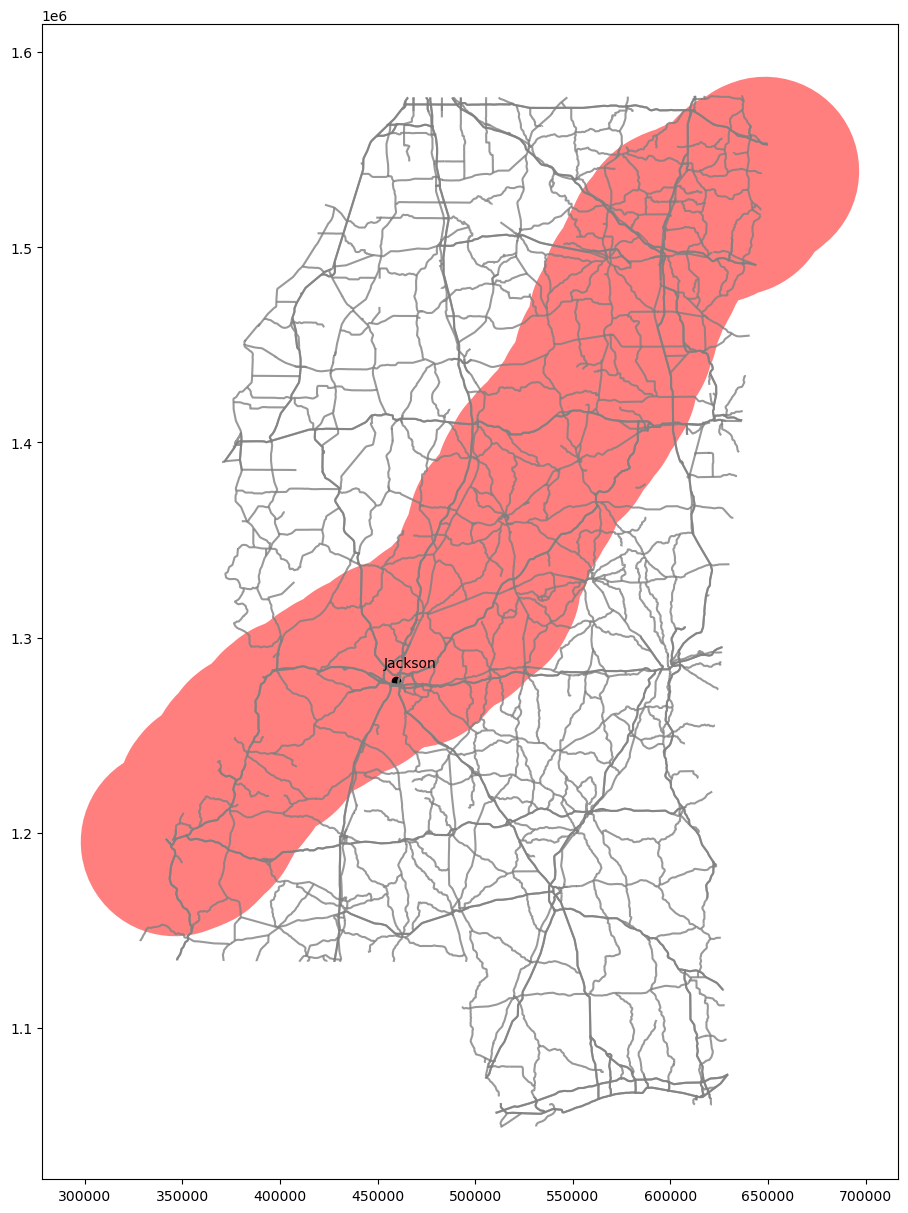

In [53]:
ax = natchezTrace.plot(alpha=.5, color="red", figsize=(15, 15))  

# passing the first plot as an axis to the second
msHighways.plot(ax=ax, color="grey", alpha=.8, figsize=(15, 15))  

# showing Jackson
jacksonGeo.plot(ax=ax, color="black", figsize=(15,15))

# showing the Label with an offset near the point
jacksonGeo.apply(lambda x: ax.annotate(text=x['City'], xy=(
    x.geometry.x, x.geometry.y), ha="center", xytext=(
    10, 10), textcoords="offset points"), axis=1);

Beautiful. Wow, we've learned a lot.

### Exercise 4

Now we'll work with buffers around Jackson.

In [61]:
# a. Find the refueling stations within a 50 mile radius of Jackson
buffer_distance = 50 * 1609.34

jacksonGeo['buffered'] = jacksonGeo['geometry'].buffer(buffer_distance)
jacksonGeo = jacksonGeo.set_geometry('buffered')

stations_within_radius = gpd.overlay(fuelingStations,jacksonGeo , how='intersection')

stations_within_radius

FID_1 Fuel_Type                                         Station_Na  \
0    3097       LPG                                   Blossman Gas Inc   
1    3109       LPG                                        Pearl River   
2    3166       LPG                                   Blossman Gas Inc   
3    3183       LPG                                   Blossman Gas Inc   
4    3230       CNG                 Waste Management - Jackson Hauling   
5    3280      ELEC                        Gray-Daniels Nissan Brandon   
6    3282      ELEC       Gray-Daniels Nissan Brandon - Service Center   
7    3283       LPG                                      J & M Propane   
8    3300      ELEC                              Cannon Nissan Jackson   
9    3301      ELEC             Cannon Nissan Jackson - Service Center   
10   3302      ELEC                        Gray-Daniels Nissan Jackson   
11   3303      ELEC       Gray-Daniels Nissan Jackson - Service Center   
12   3311       LPG                                           Neil Gas   
13   3414       LPG                                      Dowdle Gas Co   
14   3420       LPG                                     Herring Gas Co   
15   3430       LPG                                         Waring Oil   
16   3440       LPG                           Lampton-Love of Richland   
17   3451       LPG                    Lampton-Love of Crystal Springs   
18   3462      ELEC                                   Blackburn Nissan   
19   3463       LPG                                       H & M Gas Co   
20   3465      ELEC                  Blackburn Nissan - Service Center   
21   3469       LPG                                   Blossman Gas Inc   
22   3487       LPG                                     Herring Gas Co   
23   3491       LPG                                       Lampton Love   
24   3505       LPG                                   Blossman Gas Inc   
25   3509       LPG                              Lampton-Love of Magee   
26   3513       LPG                        Lampton-Love of Pelahatchie   
27   3547       LPG                                        Magee's Gas   
28   3569       LPG                                    Scott Petroleum   
29   3654       LPG                                  Moulden Supply Co   
30   3804        BD                  Thompson Field Air National Guard   
31   3805       CNG                NGV Solutions LLC - Private Station   
32   3806       CNG                                  MMC Materials Inc   
33   3899      ELEC  Entergy - Mississippi State Center for Advance...   
34   3900      ELEC                 Entergy - Jackson State University   
35   3901      ELEC                           Entergy - Medical Center   
36   3908       CNG                  Clean N' Green - Waste Management   
37   3965       CNG                 NGV Solutions LLC - Public Station   
38   3969       LNG                      Clean Energy - Pearl Flying J   
39   3998      ELEC                                    Old Capitol Inn   

                 Street_Add                                Intersecti  \
0          26136 Highway 27                                       NaN   
1             400 Rimmer St                                       NaN   
2         2086 Highway 49 S                                       NaN   
3            140 Highway 80                                       NaN   
4      1450 Country Club Dr                                       NaN   
5     108 Gray Daniels Blvd                                       NaN   
6     108 Gray Daniels Blvd                                       NaN   
7               123 Jury Rd                                       NaN   
8      905 I-20 Frontage Rd                                       NaN   
9      905 I-20 Frontage Rd                                       NaN   
10  6080 I-55 N Frontage Rd                                       NaN   
11  6080 I-55 N Frontage Rd                                       NaN   
12       40 Mississi

0     Annotation(449110, 1.24315e+06, 'O')
1     Annotation(527006, 1.31066e+06, 'O')
2     Annotation(463683, 1.26501e+06, 'O')
3      Annotation(404327, 1.2836e+06, 'O')
4     Annotation(453115, 1.28324e+06, 'O')
5      Annotation(473429, 1.2757e+06, 'E')
6      Annotation(473429, 1.2757e+06, 'E')
7     Annotation(471023, 1.28516e+06, 'O')
8     Annotation(456711, 1.27443e+06, 'E')
9     Annotation(456711, 1.27443e+06, 'E')
10    Annotation(462813, 1.28814e+06, 'E')
11    Annotation(462813, 1.28814e+06, 'E')
12    Annotation(508061, 1.28373e+06, 'O')
13    Annotation(477331, 1.31242e+06, 'O')
14    Annotation(520164, 1.32525e+06, 'O')
15    Annotation(460434, 1.27572e+06, 'O')
16    Annotation(460340, 1.27413e+06, 'O')
17    Annotation(441995, 1.24367e+06, 'O')
18     Annotation(394964, 1.2811e+06, 'E')
19    Annotation(419551, 1.28138e+06, 'O')
20     Annotation(394964, 1.2811e+06, 'E')
21    Annotation(463683, 1.26501e+06, 'O')
22    Annotation(438921, 1.23088e+06, 'O')
23    Annot

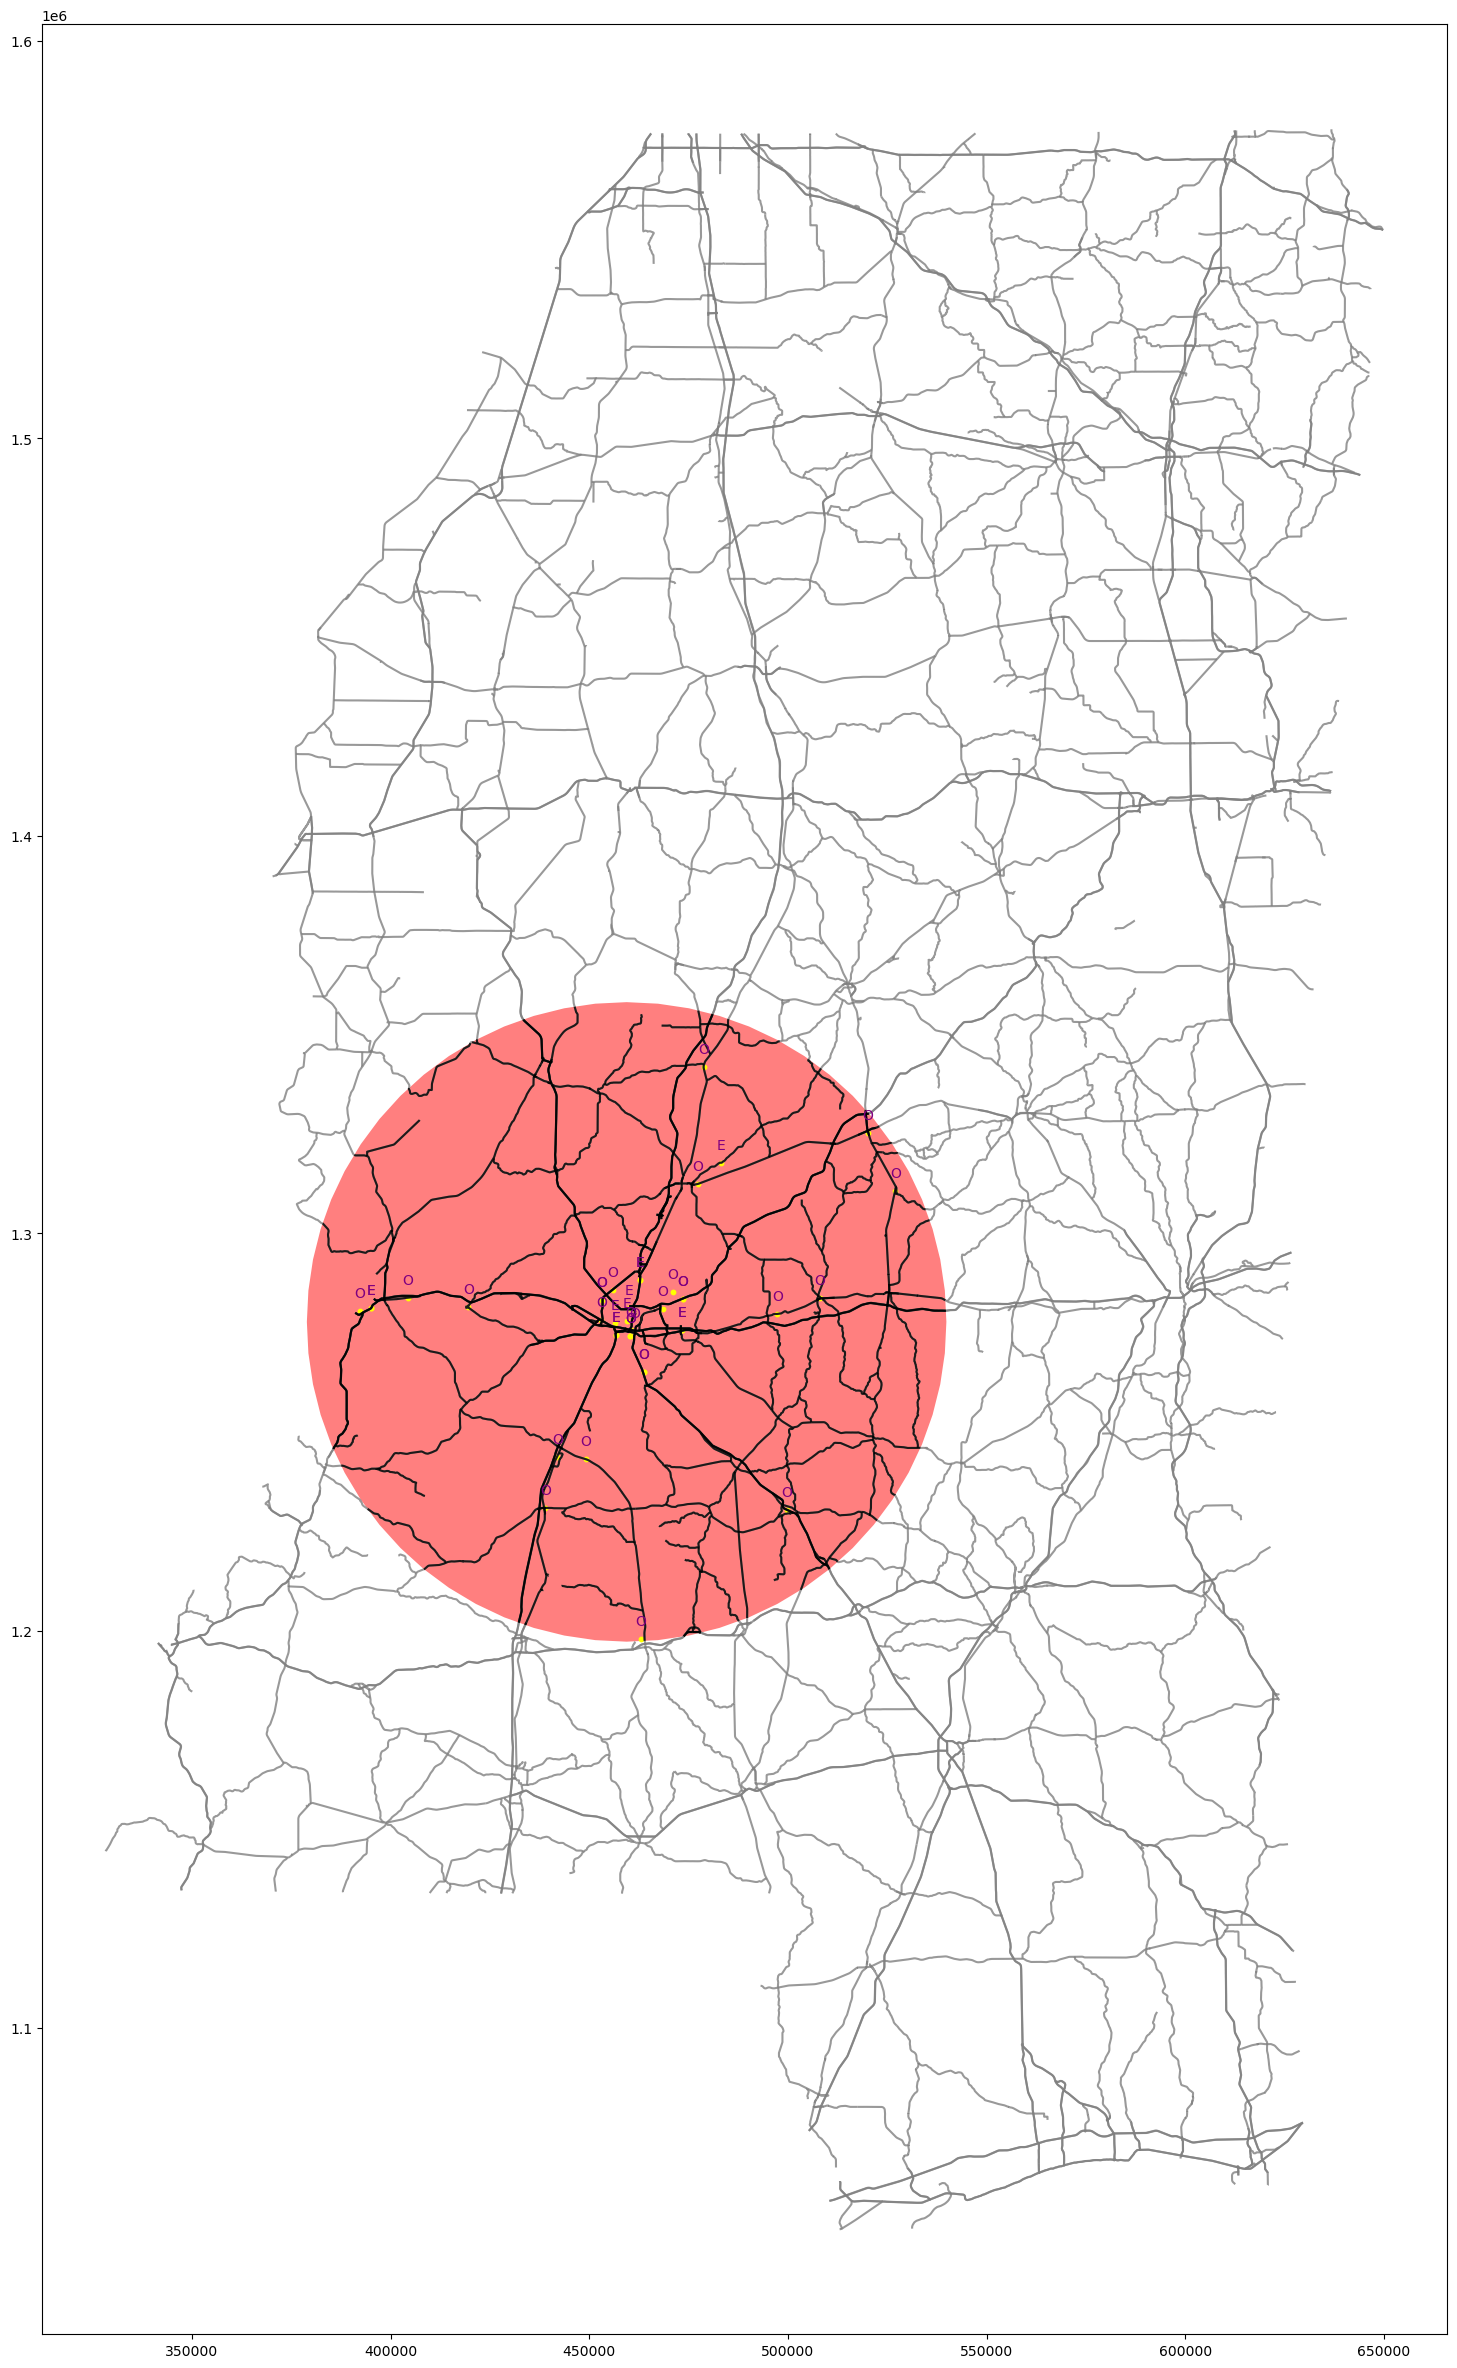

In [73]:
# b. Plot the highways (only highways that are in the radius), Jackson, 
# and the refueling stations within a 50-mile radius of it. Put "E" on 
# the electric stations and "O" for "other" on the non-electric ones.

highways_within_radius = gpd.overlay(msHighways,jacksonGeo , how='intersection')
ax = jacksonGeo['buffered'].plot(alpha=.5, color="red", figsize=(30, 30))
msHighways.plot(ax=ax, color="gray", alpha=.8, figsize=(30, 30))  
highways_within_radius.plot(ax=ax, color="black", alpha=0.8, label="Highways")
stations_within_radius.plot(ax=ax, color="yellow", markersize=10, label="Refueling Stations")
stations_within_radius.apply(
    lambda x: ax.annotate(
        text=x['label'],  # Add "E" or "O" as the label
        xy=(x.geometry.x, x.geometry.y),  # Coordinates of the station
        ha="center",
        xytext=(0, 10),  # Offset the label slightly above the point
        textcoords="offset points",
        fontsize=10,
        color="purple"
    ),
    axis=1
)


## Putting it All Together

For some of the next activities, you may need to use the "overlay" technique described in the Geopandas documentation (https://geopandas.org/en/stable/docs/user_guide/set_operations.html). Part of the assignment is working out how to do it on your own based on the documentation. In real life, you'll be constantly having to "make it work" based on documentation, stack overflow, etc. **Try hard not to ask for help at first until you've checked out the documentation and tried to work out how to do it.**

You will also be looking at Census data for the first time, so you may have to do some legwork in understanding what MARIS says about the data.

You will probably need to make buffers.

And finally, you may need to "count things in things" as we did in the previous lab.

In [77]:
# Exercise 5

# 1. Download and read into geopandas the Census 2020 Block 
# Level Population and Housing from MARIS. (called "2020 Blocks Population and Housing")
msHousing = gpd.read_file('MS_CENSUSBlocksPopulationHousing_2020/MS_CENSUSBlocksPopulationHousing_2020.shp')
msHousing.head(3)

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
0        28        037    950200      4029  280379502004029  Block 4029   
1        28        037    950200      1070  280379502001070  Block 1070   
2        28        027    950100      2021  280279501002021  Block 2021   

  MTFCC20  UR20 UACE20 UATYPE20  ... P0050002  P0050003  P0050004 P0050005  \
0   G5040  None   None     None  ...      0.0       0.0       0.0      0.0   
1   G5040  None   None     None  ...      0.0       0.0       0.0      0.0   
2   G5040  None   None     None  ...      0.0       0.0       0.0      0.0   

  P0050006 P0050007 P0050008 P0050009 P0050010  \
0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0   

                                            geometry  
0  POLYGON ((376898.685 1190446.834, 376899.766 1...  
1  POLYGON ((366513.668 1189850.105, 366516.8 119...  
2  POLYGON ((433838.721 1498966.876, 433839.292 1...  

[3 rows x 53 columns]

In [121]:
print(len(msHousing))

112241


In [85]:
msHousing.crs

<Projected CRS: EPSG:3814>
Name: NAD83 / Mississippi TM
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Mississippi.
- bounds: (-91.65, 30.01, -88.09, 35.01)
Coordinate Operation:
- name: Mississippi Transverse Mercator
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [83]:
# 2. Perform the analysis necessary to answer and plot the following:

# a. How many houses are within 2 miles of the ten longest designated highways?
topHighways = msHighways.sort_values(by=['real_length'], ascending=False).head(10)
buffer_2miles = 2 * 1609.34
topHighways['buffered'] = topHighways['geometry'].buffer(buffer_2miles)
topHighways = topHighways.set_geometry('buffered')
houses_within_buffer = gpd.overlay(topHighways, msHousing, how = 'intersection')
houses_within_buffer

OBJECTID    LENGTH HWYNAME  CLASS ALT1_DESIN ALT2_DESIN ALT3_DESIN  \
0           229  824574.0    I 55      1       None       None       None   
1           229  824574.0    I 55      1       None       None       None   
2           229  824574.0    I 55      1       None       None       None   
3           229  824574.0    I 55      1       None       None       None   
4           229  824574.0    I 55      1       None       None       None   
...         ...       ...     ...    ...        ...        ...        ...   
56487      2030  454376.0    I 59      1       None       None       None   
56488      2030  454376.0    I 59      1       None       None       None   
56489      2030  454376.0    I 59      1       None       None       None   
56490      2030  454376.0    I 59      1       None       None       None   
56491      2030  454376.0    I 59      1       None       None       None   

      ALT4_DESIN ALT5_DESIN ALT6_DESIN  ... P0050001  P0050002 P0050003  \
0           None       None       None  ...      0.0       0.0      0.0   
1           None       None       None  ...      0.0       0.0      0.0   
2           None       None       None  ...      0.0       0.0      0.0   
3           None       None       None  ...      0.0       0.0      0.0   
4           None       None       None  ...      0.0       0.0      0.0   
...          ...        ...        ...  ...      ...       ...      ...   
56487       None       None       None  ...      0.0       0.0      0.0   
56488       None       None       None  ...      0.0       0.0      0.0   
56489       None       None       None  ...      0.0       0.0      0.0   
56490       None       None       None  ...      0.0       0.0      0.0   
56491       None       None       None  ...      0.0       0.0      0.0   

       P0050004 P0050005 P0050006 P0050007 P0050008 P0050009 P0050010  
0           0.0      0.0      0.0      0.0      0.0      0.0      0.0  
1           0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2           0.0      0.0      0.0      0.0      0.0      0.0      0.0  
3           0.0      0.0      0.0      0.0      0.0      0.0      0.0  
4           0.0      0.0      0.0      0.0      0.0      0.0      0.0  
...         ...      ...      ...      ...      ...      ...      ...  
56487       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
56488       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
56489       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
56490       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
56491       0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[56492 rows x 66 columns]

In [89]:
print(len(houses_within_buffer))
#56,492 houses within 2 mile radius of top 10 designated highways

56492


In [91]:
# b. How many houses are within 5 miles of the Natchez Trace?
buffer_5miles_n = 5 *1609.34
natchezTrace['buffered_5miles'] = natchezTrace['geometry'].buffer(buffer_5miles_n)
natchezTrace = natchezTrace.set_geometry('buffered_5miles')
houses_within_5mile_natchezTrace = gpd.overlay(natchezTrace, msHousing, how='intersection')
houses_within_5mile_natchezTrace

OBJECTID    LENGTH             HWYNAME  CLASS ALT1_DESIN ALT2_DESIN  \
0           616  503580.0  NATCHEZ TRACE PKWY      5       None       None   
1           616  503580.0  NATCHEZ TRACE PKWY      5       None       None   
2           616  503580.0  NATCHEZ TRACE PKWY      5       None       None   
3           616  503580.0  NATCHEZ TRACE PKWY      5       None       None   
4           616  503580.0  NATCHEZ TRACE PKWY      5       None       None   
...         ...       ...                 ...    ...        ...        ...   
10110       616  503580.0  NATCHEZ TRACE PKWY      5       None       None   
10111       616  503580.0  NATCHEZ TRACE PKWY      5       None       None   
10112       616  503580.0  NATCHEZ TRACE PKWY      5       None       None   
10113       616  503580.0  NATCHEZ TRACE PKWY      5       None       None   
10114       616  503580.0  NATCHEZ TRACE PKWY      5       None       None   

      ALT3_DESIN ALT4_DESIN ALT5_DESIN ALT6_DESIN  ... P0050001  P0050002  \
0           None       None       None       None  ...      0.0       0.0   
1           None       None       None       None  ...      0.0       0.0   
2           None       None       None       None  ...      0.0       0.0   
3           None       None       None       None  ...      0.0       0.0   
4           None       None       None       None  ...      0.0       0.0   
...          ...        ...        ...        ...  ...      ...       ...   
10110       None       None       None       None  ...      0.0       0.0   
10111       None       None       None       None  ...      0.0       0.0   
10112       None       None       None       None  ...      0.0       0.0   
10113       None       None       None       None  ...      0.0       0.0   
10114       None       None       None       None  ...      0.0       0.0   

      P0050003  P0050004 P0050005 P0050006 P0050007 P0050008 P0050009 P0050010  
0          0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
1          0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2          0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
3          0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
4          0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
...        ...       ...      ...      ...      ...      ...      ...      ...  
10110      0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
10111      0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
10112      0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
10113      0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0  
10114      0.0       0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[10115 rows x 67 columns]

In [95]:
print(len(houses_within_5mile_natchezTrace))
#10,115 houses within 5 mile of Natchez Trace Parkway

10115


In [105]:
# c. How many houses in MS are within 5 miles of any alternative fuel station?
buffer_5miles_a = 5 *1609.34
alternative_stations = fuelingStations[fuelingStations['label'] == "O"]
alternative_stations['buffered_5miles'] = alternative_stations['geometry'].buffer(buffer_5miles_a)
alternative_stations = alternative_stations.set_geometry('buffered_5miles')
houses_within_5miles_alternative = gpd.overlay(alternative_stations,msHousing, how='intersection')
houses_within_5miles_alternative

C:\Users\ishas\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


FID_1 Fuel_Type                     Station_Na        Street_Add  \
0       3037       LPG                  Dowdle Gas Co  8224 Highway 178   
1       3037       LPG                  Dowdle Gas Co  8224 Highway 178   
2       3037       LPG                  Dowdle Gas Co  8224 Highway 178   
3       3037       LPG                  Dowdle Gas Co  8224 Highway 178   
4       3037       LPG                  Dowdle Gas Co  8224 Highway 178   
...      ...       ...                            ...               ...   
86499   3969       LNG  Clean Energy - Pearl Flying J  685 Highway 80 E   
86500   3969       LNG  Clean Energy - Pearl Flying J  685 Highway 80 E   
86501   3969       LNG  Clean Energy - Pearl Flying J  685 Highway 80 E   
86502   3969       LNG  Clean Energy - Pearl Flying J  685 Highway 80 E   
86503   3969       LNG  Clean Energy - Pearl Flying J  685 Highway 80 E   

      Intersecti     City State    ZIP  Plus4    Station_Ph  ... P0050001  \
0            NaN  Byhalia    MS  38611      0  662-838-6559  ...      0.0   
1            NaN  Byhalia    MS  38611      0  662-838-6559  ...      0.0   
2            NaN  Byhalia    MS  38611      0  662-838-6559  ...      0.0   
3            NaN  Byhalia    MS  38611      0  662-838-6559  ...      0.0   
4            NaN  Byhalia    MS  38611      0  662-838-6559  ...      0.0   
...          ...      ...   ...    ...    ...           ...  ...      ...   
86499        NaN    Pearl    MS  39208      0  562-493-2804  ...      0.0   
86500        NaN    Pearl    MS  39208      0  562-493-2804  ...      0.0   
86501        NaN    Pearl    MS  39208      0  562-493-2804  ...      0.0   
86502        NaN    Pearl    MS  39208      0  562-493-2804  ...      0.0   
86503        NaN    Pearl    MS  39208      0  562-493-2804  ...      0.0   

      P0050002 P0050003 P0050004 P0050005 P0050006 P0050007  P0050008  \
0          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
4          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
...        ...      ...      ...      ...      ...      ...       ...   
86499      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
86500      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
86501      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
86502      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
86503      0.0      0.0      0.0      0.0      0.0      0.0       0.0   

       P0050009  P0050010  
0           0.0       0.0  
1           0.0       0.0  
2           0.0       0.0  
3           0.0       0.0  
4           0.0       0.0  
...         ...       ...  
86499       0.0       0.0  
86500       0.0       0.0  
86501       0.0       0.0  
86502       0.0       0.0  
86503       0.0       0.0  

[86504 rows x 94 columns]

In [109]:
print(len(houses_within_5miles_alternative))
#86,504 houses within 5 mile radius of alternative fueling stations

86504


In [114]:
# d. How many houses are within 5 miles of an electric fuel station?
buffer_5miles_e = 5 *1609.34
electric_stations['buffered_5miles'] = electric_stations['geometry'].buffer(buffer_5miles_e)
electric_stations = electric_stations.set_geometry('buffered_5miles')
houses_within_5miles_electric = gpd.overlay(electric_stations,msHousing, how='intersection')
houses_within_5miles_electric

FID_1 Fuel_Type                   Station_Na             Street_Add  \
0       3280      ELEC  Gray-Daniels Nissan Brandon  108 Gray Daniels Blvd   
1       3280      ELEC  Gray-Daniels Nissan Brandon  108 Gray Daniels Blvd   
2       3280      ELEC  Gray-Daniels Nissan Brandon  108 Gray Daniels Blvd   
3       3280      ELEC  Gray-Daniels Nissan Brandon  108 Gray Daniels Blvd   
4       3280      ELEC  Gray-Daniels Nissan Brandon  108 Gray Daniels Blvd   
...      ...       ...                          ...                    ...   
41793   3998      ELEC              Old Capitol Inn         226 N State St   
41794   3998      ELEC              Old Capitol Inn         226 N State St   
41795   3998      ELEC              Old Capitol Inn         226 N State St   
41796   3998      ELEC              Old Capitol Inn         226 N State St   
41797   3998      ELEC              Old Capitol Inn         226 N State St   

      Intersecti     City State    ZIP  Plus4    Station_Ph  ... P0050001  \
0            NaN  Brandon    MS  39042      0  601-948-3050  ...      0.0   
1            NaN  Brandon    MS  39042      0  601-948-3050  ...      0.0   
2            NaN  Brandon    MS  39042      0  601-948-3050  ...      0.0   
3            NaN  Brandon    MS  39042      0  601-948-3050  ...      0.0   
4            NaN  Brandon    MS  39042      0  601-948-3050  ...      0.0   
...          ...      ...   ...    ...    ...           ...  ...      ...   
41793        NaN  Jackson    MS  39201      0  888-758-4389  ...      0.0   
41794        NaN  Jackson    MS  39201      0  888-758-4389  ...      0.0   
41795        NaN  Jackson    MS  39201      0  888-758-4389  ...      0.0   
41796        NaN  Jackson    MS  39201      0  888-758-4389  ...      0.0   
41797        NaN  Jackson    MS  39201      0  888-758-4389  ...      0.0   

      P0050002 P0050003 P0050004 P0050005 P0050006 P0050007  P0050008  \
0          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
4          0.0      0.0      0.0      0.0      0.0      0.0       0.0   
...        ...      ...      ...      ...      ...      ...       ...   
41793      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
41794      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
41795      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
41796      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
41797      0.0      0.0      0.0      0.0      0.0      0.0       0.0   

       P0050009  P0050010  
0           0.0       0.0  
1           0.0       0.0  
2           0.0       0.0  
3           0.0       0.0  
4           0.0       0.0  
...         ...       ...  
41793       0.0       0.0  
41794       0.0       0.0  
41795       0.0       0.0  
41796       0.0       0.0  
41797       0.0       0.0  

[41798 rows x 94 columns]

In [118]:
print(len(houses_within_5miles_electric))
#41,798 houses within 5 mile of electric fueling stations

41798
